In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
SC=StandardScaler()
import warnings
warnings.filterwarnings("ignore")

# Question 1

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Pre-processing

In [3]:
categorical_to_numerical_values = {"Gender": {"Male": 1, "Female": 0} }
data = data.replace(categorical_to_numerical_values)
X = np.array(data.drop(['User ID','Purchased','Gender'],axis=1))
X = SC.fit_transform(X)
X = np.column_stack([np.ones(len(X)),data['Gender'],X])
# X = np.column_stack([np.ones(len(X)),X])
Y = data['Purchased']
data['Age'] = X[:,2]
data['EstimatedSalary'] = X[:,3]

<AxesSubplot:>

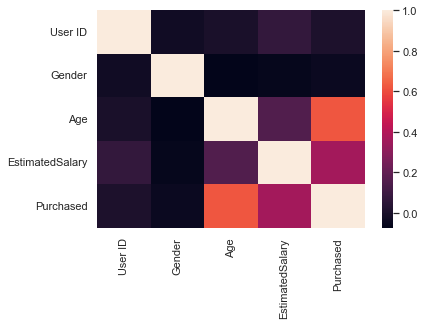

In [4]:
sns.heatmap(data.corr())

In [5]:
x_0 = X[Y==0]
x_1 = X[Y==1]
y_0 = Y[Y==0]
y_1 = Y[Y==1]

## 3D plot with different colors for y labels

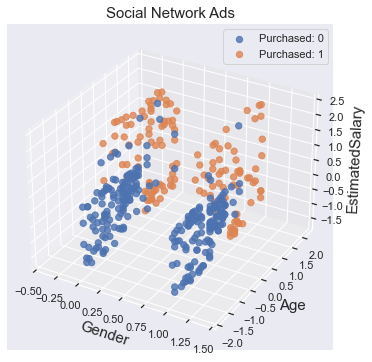

In [6]:
fig = plt.figure(figsize = (12, 6))
ax = plt.axes(projection ="3d")
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3, alpha = 0.2)
sctt = ax.scatter3D(x_0[:,1], x_0[:,2], x_0[:,3],alpha = 0.8,marker ='o', s=40)
sctt = ax.scatter3D(x_1[:,1], x_1[:,2], x_1[:,3],alpha = 0.8,marker ='o', s=40)
plt.title("Social Network Ads", fontsize=15)
ax.set_xlabel('Gender', fontsize=15)
ax.set_xlim(-0.5,1.5)
ax.set_ylabel('Age', fontsize=15)
ax.set_zlabel('EstimatedSalary', fontsize=15)
ax.legend(['Purchased: 0','Purchased: 1'])
plt.show()

In [7]:
def h(theta,x):
    mat = np.dot(x,theta)
    return 1./(1 + np.exp(-1*mat))
    
def get_theta(theta,x,y,alpha):
    next_theta = theta - alpha*np.dot(x.T,(h(theta,x).T - y).T)
    return next_theta

def cost(theta,x,y):
    cost = []
    for i in range(len(y)):
        cost.append(y[i]*np.log(h(theta,x[i])) +  (1-y[i])*np.log(1-h(theta,x[i])))
    
    return np.sum(cost)

def classify(x,theta):
    if np.dot(x,theta)>0:
        return 1
    else:
        return 0

def get_metrics(real,pred):
    n = len(real)
    tp = 0; tn = 0; fp = 0; fn = 0
    for i in range(n):
        if real[i]==pred[i]:
            if real[i]==1:
                tp+=1
            else:
                tn+=1
        else:
            if real[i]==0:
                fp+=1
            else:
                fn+=1
            
    accuracy = (tp+tn)/n
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1 = 2*precision*recall/(precision + recall)
    confusion_matrix = [[tn, fp],[fn, tp]]
    return accuracy, precision, recall, f1, confusion_matrix


## Split into training and testing set

In [8]:
x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size =0.1, random_state = 0, stratify=Y)

In [9]:
y_test = np.array(y_test)
y_train = np.array(y_train)

## Get the Parameters

In [10]:
m = len(y_train)
n = len(x_train[0])
theta = np.zeros([n,1])
iterations = 10000
alpha =0.0001
j_theta = []
for i in range(iterations):
    j_theta.append(-cost(theta,x_train,y_train)/m)
    theta = get_theta(theta,x_train,y_train,alpha)
print('Theta0: ',theta[0,0],'\nTheta1: ',theta[1,0],'\nTheta2: ',theta[2,0],'\nTheta3: ',theta[3,0])
print()

Theta0:  -1.2392196790395447 
Theta1:  0.2149110501550106 
Theta2:  2.3525012347012835 
Theta3:  1.1950110270768595



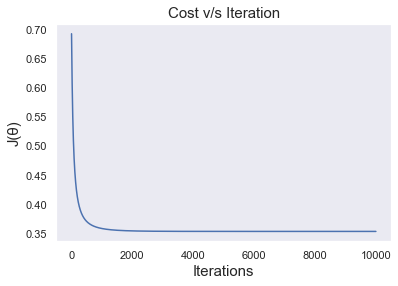

In [11]:
plt.plot(np.arange(0,iterations,1),j_theta)
plt.xlabel('Iterations',fontsize=15)
plt.ylabel('J(θ)',fontsize=15)
plt.title('Cost v/s Iteration',fontsize=15)
plt.grid()

## Evaluate the necessary metrics to show the goodness of fit

In [12]:
y_pred = []
for i in range(len(x_test)):
    y_pred.append(classify(x_test[i],theta))

accuracy, precision, recall, f1, confusionMatrix = get_metrics(y_test,y_pred)
print('Accuracy of our model: ', accuracy)
print('Precision of our model: ', precision)
print('Recall of our model: ', recall)
print('F1 score of our model: ', f1)

Accuracy of our model:  0.875
Precision of our model:  0.9090909090909091
Recall of our model:  0.7142857142857143
F1 score of our model:  0.8


Text(0.5, 1.0, 'Our LogisticRegression')

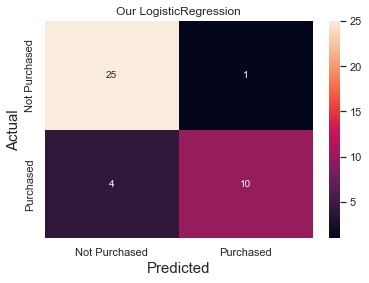

In [13]:
sns.heatmap(confusionMatrix,annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.title('Our LogisticRegression')

## Repeat using inbuilt functions

In [14]:
clf = LogisticRegression(max_iter=10000).fit(x_train, y_train)

In [15]:
coefs = [clf.intercept_[0],clf.coef_[0,1],clf.coef_[0,2],clf.coef_[0,3]]
print('Theta0: ',coefs[0],'\nTheta1: ',coefs[1],'\nTheta2: ',coefs[2],'\nTheta3: ',coefs[3])

Theta0:  -1.1638809746348533 
Theta1:  0.1725610368532043 
Theta2:  2.173409651079026 
Theta3:  1.105823499417423


In [16]:
accuracy_inbuilt = accuracy_score(y_test, clf.predict(x_test))
precision_inbuilt = precision_score(y_test, clf.predict(x_test))
recall_inbuilt = recall_score(y_test, clf.predict(x_test))
f1_inbuilt = f1_score(y_test, clf.predict(x_test))
print('Accuracy of inbuilt model: ', accuracy_inbuilt)
print('Precision of inbuilt model: ', precision_inbuilt)
print('Recall of inbuilt model: ', recall_inbuilt)
print('F1 score of inbuilt model: ', f1_inbuilt)

Accuracy of inbuilt model:  0.875
Precision of inbuilt model:  0.9090909090909091
Recall of inbuilt model:  0.7142857142857143
F1 score of inbuilt model:  0.8


Text(0.5, 1.0, 'Inbuilt LogisticRegression')

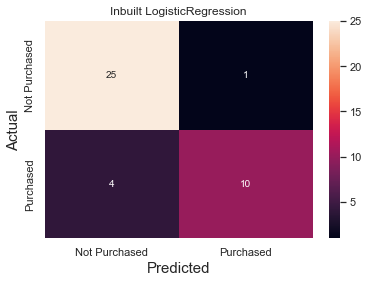

In [17]:
tn, fp, fn, tp  = confusion_matrix(y_test, clf.predict(x_test)).ravel()
sns.heatmap([[tn,fp],[fn,tp]],annot=True,xticklabels=['Not Purchased','Purchased'],yticklabels=['Not Purchased','Purchased'])
plt.xlabel('Predicted',fontsize=15)
plt.ylabel('Actual',fontsize=15)
plt.title('Inbuilt LogisticRegression')

## Metrics for Training data

In [18]:
y_pred_train = []
for i in range(len(x_train)):
    y_pred_train.append(classify(x_train[i],theta))

accuracy, precision, recall, f1, confusionMatrix = get_metrics(y_train,y_pred_train)
print('Accuracy of our model: ', accuracy)
print('Precision of our model: ', precision)
print('Recall of our model: ', recall)
print('F1 score of our model: ', f1)

Accuracy of our model:  0.85
Precision of our model:  0.831858407079646
Recall of our model:  0.7286821705426356
F1 score of our model:  0.7768595041322314


In [19]:
y_inbuilt_train = clf.predict(x_train)
accuracy, precision, recall, f1, confusionMatrix = get_metrics(y_train,y_inbuilt_train)
print('Accuracy of our model: ', accuracy)
print('Precision of our model: ', precision)
print('Recall of our model: ', recall)
print('F1 score of our model: ', f1)

Accuracy of our model:  0.8444444444444444
Precision of our model:  0.8288288288288288
Recall of our model:  0.7131782945736435
F1 score of our model:  0.7666666666666668


# Question 2

In [20]:
df = pd.read_csv("Iris.csv")

print("net size = ",df.shape)
df.head(10)


net size =  (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
print(df[df['Species']=='Iris-setosa'].describe())
setosa_df = df[df['Species']=='Iris-setosa']


             Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  50.00000       50.00000     50.000000      50.000000      50.00000
mean   25.50000        5.00600      3.418000       1.464000       0.24400
std    14.57738        0.35249      0.381024       0.173511       0.10721
min     1.00000        4.30000      2.300000       1.000000       0.10000
25%    13.25000        4.80000      3.125000       1.400000       0.20000
50%    25.50000        5.00000      3.400000       1.500000       0.20000
75%    37.75000        5.20000      3.675000       1.575000       0.30000
max    50.00000        5.80000      4.400000       1.900000       0.60000


In [22]:
print(df[df['Species']=='Iris-versicolor'].describe())
versicolor_df = df[df['Species']=='Iris-versicolor']


              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000      50.000000     50.000000      50.000000     50.000000
mean    75.50000       5.936000      2.770000       4.260000      1.326000
std     14.57738       0.516171      0.313798       0.469911      0.197753
min     51.00000       4.900000      2.000000       3.000000      1.000000
25%     63.25000       5.600000      2.525000       4.000000      1.200000
50%     75.50000       5.900000      2.800000       4.350000      1.300000
75%     87.75000       6.300000      3.000000       4.600000      1.500000
max    100.00000       7.000000      3.400000       5.100000      1.800000


In [23]:
print(df[df['Species']=='Iris-virginica'].describe())
virginica_df = df[df['Species']=='Iris-virginica']


              Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   50.00000       50.00000     50.000000      50.000000      50.00000
mean   125.50000        6.58800      2.974000       5.552000       2.02600
std     14.57738        0.63588      0.322497       0.551895       0.27465
min    101.00000        4.90000      2.200000       4.500000       1.40000
25%    113.25000        6.22500      2.800000       5.100000       1.80000
50%    125.50000        6.50000      3.000000       5.550000       2.00000
75%    137.75000        6.90000      3.175000       5.875000       2.30000
max    150.00000        7.90000      3.800000       6.900000       2.50000


We shall first plot a pie plot to find the % of each species. Pie chart elegantly ties up each information. We find that all the species are equal in number

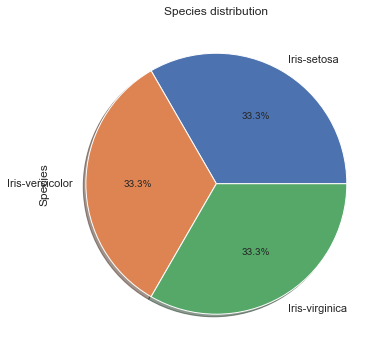

In [24]:
df['Species'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(6,6))
plt.title('Species distribution')
plt.show()

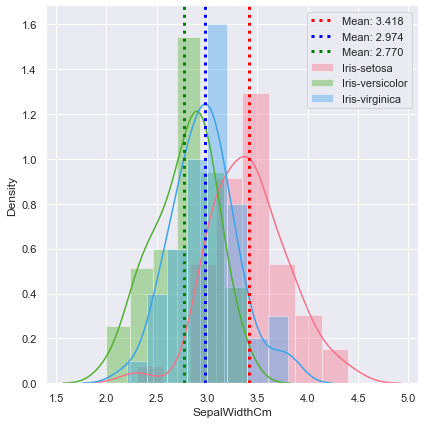

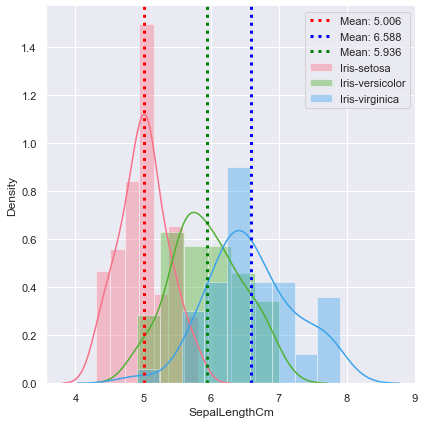

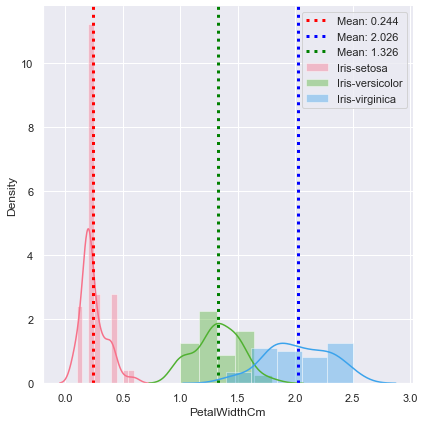

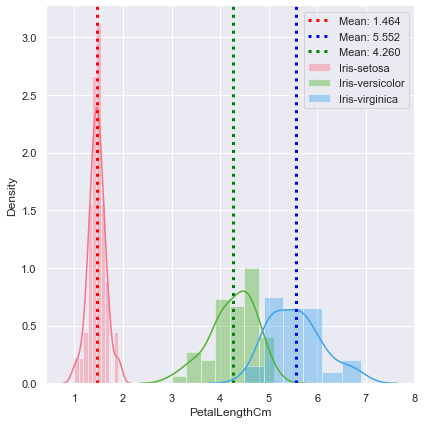

In [25]:
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.distplot, "SepalWidthCm")
plt.axvline(setosa_df['SepalWidthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_df['SepalWidthCm'].mean()))
plt.axvline(virginica_df['SepalWidthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_df['SepalWidthCm'].mean()))
plt.axvline(versicolor_df['SepalWidthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_df['SepalWidthCm'].mean()))
plt.legend()
plt.show()

print()
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.distplot, "SepalLengthCm")
plt.axvline(setosa_df['SepalLengthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_df['SepalLengthCm'].mean()))
plt.axvline(virginica_df['SepalLengthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_df['SepalLengthCm'].mean()))
plt.axvline(versicolor_df['SepalLengthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_df['SepalLengthCm'].mean()))
plt.legend()
plt.show()

print()
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.distplot, "PetalWidthCm")
plt.axvline(setosa_df['PetalWidthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_df['PetalWidthCm'].mean()))
plt.axvline(virginica_df['PetalWidthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_df['PetalWidthCm'].mean()))
plt.axvline(versicolor_df['PetalWidthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_df['PetalWidthCm'].mean()))
plt.legend()
plt.show()

print()
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.distplot, "PetalLengthCm")
plt.axvline(setosa_df['PetalLengthCm'].mean(), color='red', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(setosa_df['PetalLengthCm'].mean()))
plt.axvline(virginica_df['PetalLengthCm'].mean(), color='blue', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(virginica_df['PetalLengthCm'].mean()))
plt.axvline(versicolor_df['PetalLengthCm'].mean(), color='green', linestyle=':', linewidth=3, label = "Mean: {:.3f}".format(versicolor_df['PetalLengthCm'].mean()))
plt.legend()
plt.show()
print()
# sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(plt.hist, "PetalLengthCm").add_legend()
# plt.show()

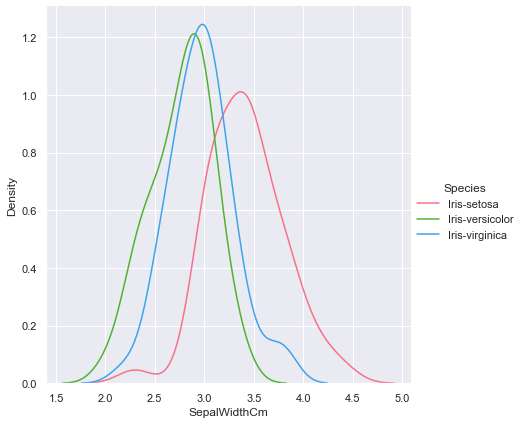

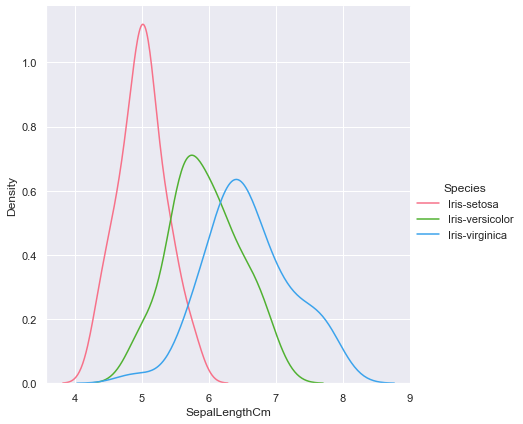

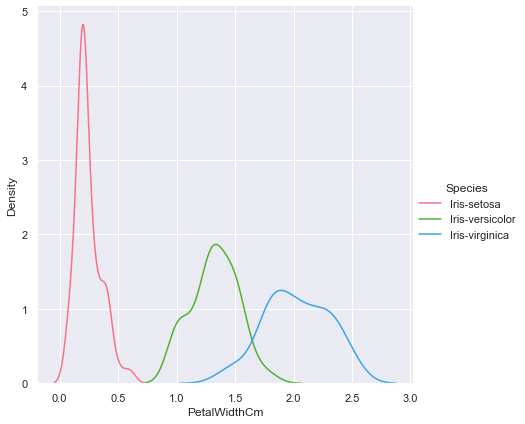

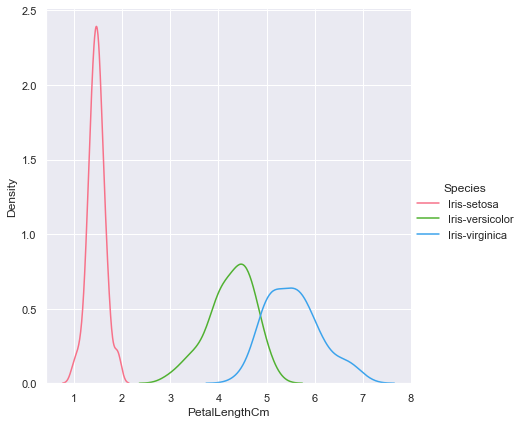

In [26]:
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.kdeplot, "SepalWidthCm").add_legend()
plt.show()
print()
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.kdeplot, "SepalLengthCm").add_legend()
plt.show()
print()
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.kdeplot, "PetalWidthCm").add_legend()
plt.show()
print()
sns.FacetGrid(df, hue="Species", palette="husl", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()
plt.show()
print()

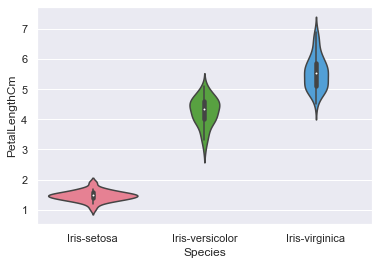

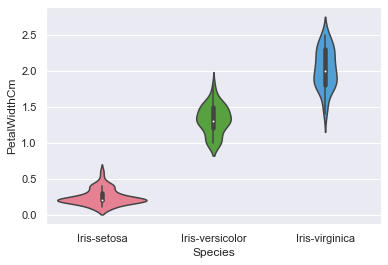

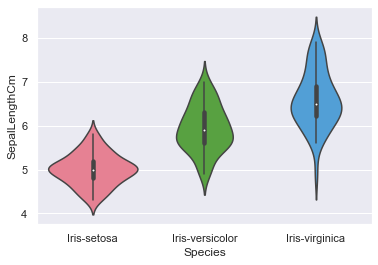

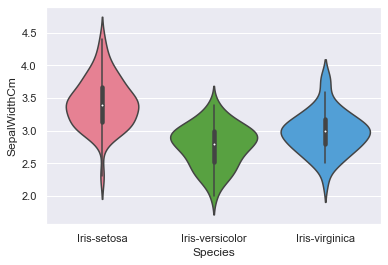

In [27]:
sns.violinplot(x=df["Species"], y=df['PetalLengthCm'], palette="husl", data=df)
plt.show()
print()
sns.violinplot(x=df["Species"], y=df['PetalWidthCm'], palette="husl", data=df)
plt.show()
print()
sns.violinplot(x=df["Species"], y=df['SepalLengthCm'], palette="husl", data=df)
plt.show()
print()
sns.violinplot(x=df["Species"], y=df['SepalWidthCm'], palette="husl", data=df)
plt.show()
print()

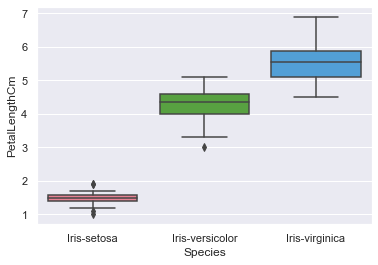

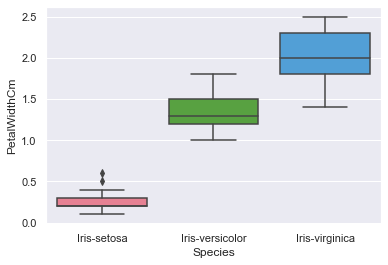

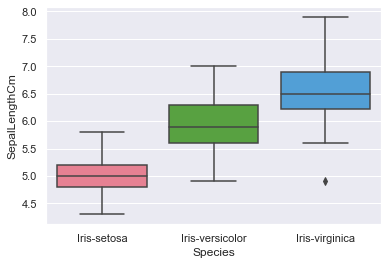

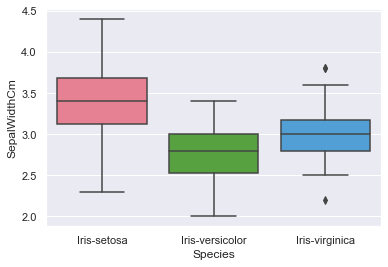

In [28]:
sns.boxplot(x=df["Species"], y=df['PetalLengthCm'], palette="husl", data=df)
plt.show()
print()
sns.boxplot(x=df["Species"], y=df['PetalWidthCm'], palette="husl", data=df)
plt.show()
print()
sns.boxplot(x=df["Species"], y=df['SepalLengthCm'], palette="husl", data=df)
plt.show()
print()
sns.boxplot(x=df["Species"], y=df['SepalWidthCm'], palette="husl", data=df)
plt.show()
print()

# Question 3

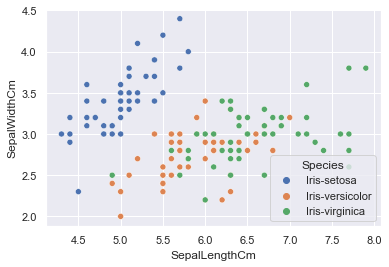

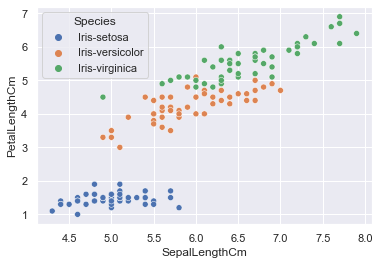

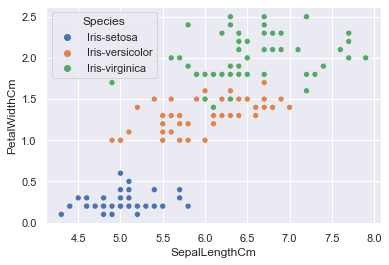

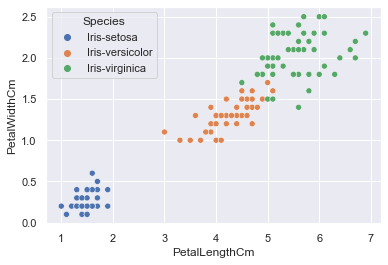

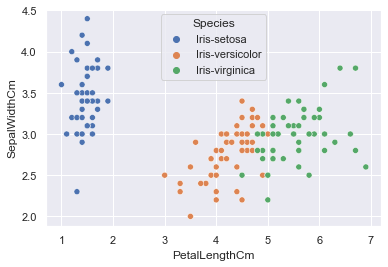

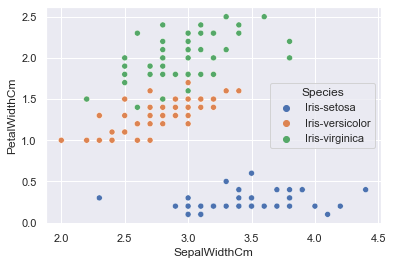

In [29]:
sns.scatterplot( x=df['SepalLengthCm'],y=df['SepalWidthCm'],data=df, hue="Species")
plt.show()
print()
sns.scatterplot( x=df['SepalLengthCm'],y=df['PetalLengthCm'],data=df, hue="Species")
plt.show()
print()
sns.scatterplot( x=df['SepalLengthCm'],y=df['PetalWidthCm'],data=df, hue="Species")
plt.show()

sns.scatterplot( x=df['PetalLengthCm'],y=df['PetalWidthCm'],data=df, hue="Species")
plt.show()

sns.scatterplot( x=df['PetalLengthCm'],y=df['SepalWidthCm'],data=df, hue="Species")
plt.show()
print()
sns.scatterplot( x=df['SepalWidthCm'],y=df['PetalWidthCm'],data=df, hue="Species")
plt.show()


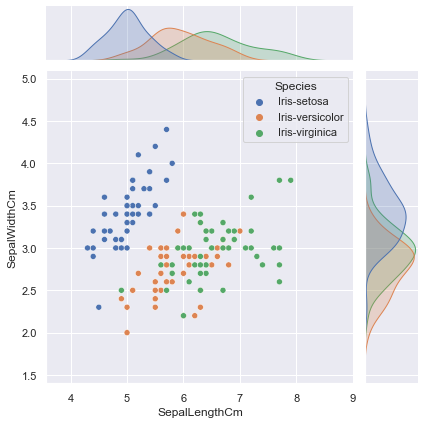

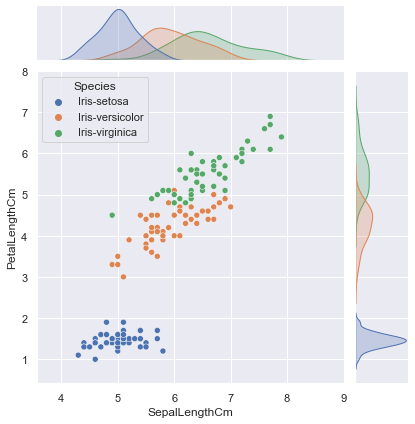

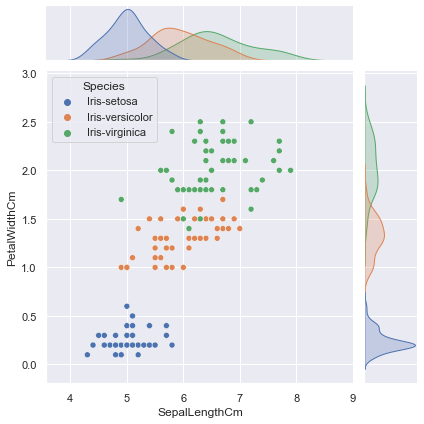

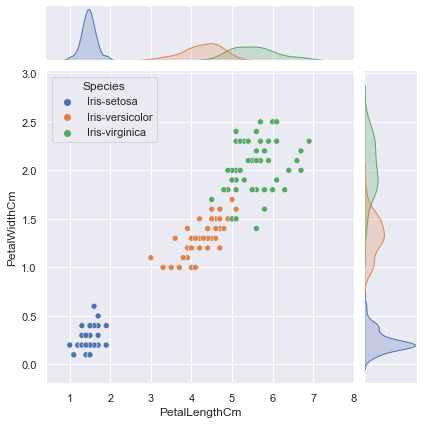

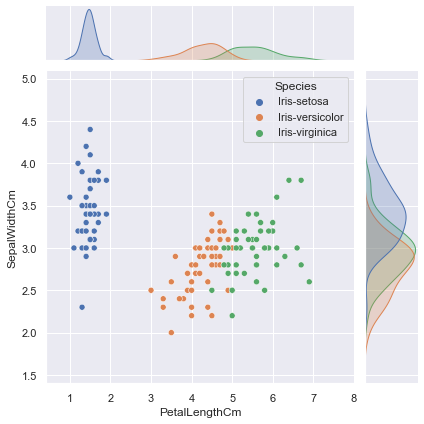

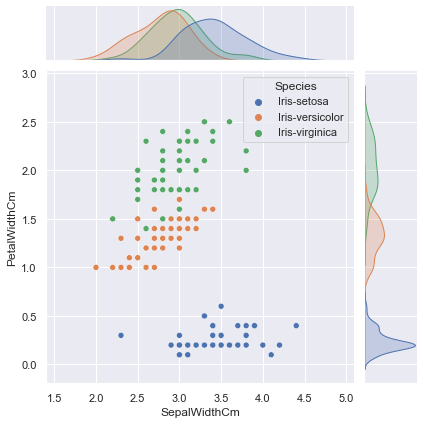

In [30]:
sns.jointplot( x=df['SepalLengthCm'],y=df['SepalWidthCm'],data=df, hue="Species")
plt.show()
print()
sns.jointplot( x=df['SepalLengthCm'],y=df['PetalLengthCm'],data=df, hue="Species")
plt.show()
print()
sns.jointplot( x=df['SepalLengthCm'],y=df['PetalWidthCm'],data=df, hue="Species")
plt.show()

sns.jointplot( x=df['PetalLengthCm'],y=df['PetalWidthCm'],data=df, hue="Species")
plt.show()

sns.jointplot( x=df['PetalLengthCm'],y=df['SepalWidthCm'],data=df, hue="Species")
plt.show()
print()
sns.jointplot( x=df['SepalWidthCm'],y=df['PetalWidthCm'],data=df, hue="Species")
plt.show()


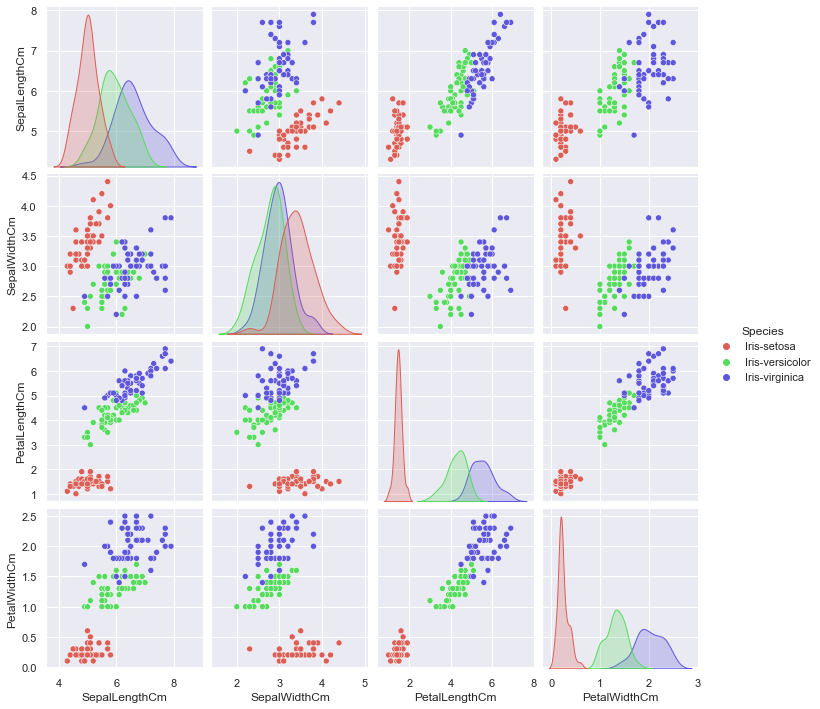

In [31]:
sns.pairplot( df.drop('Id',axis=1),hue="Species", palette="hls", diag_kind="kde",data=df)
plt.show()

# Question 4

In [32]:
dataset = pd.read_csv('iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
dataset.drop('Id', inplace=True, axis=1)

In [34]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
X = dataset.iloc[:, [0,1,2,3]].values
y = dataset.iloc[:, 4].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=100, multi_class='auto',n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(random_state=0)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)

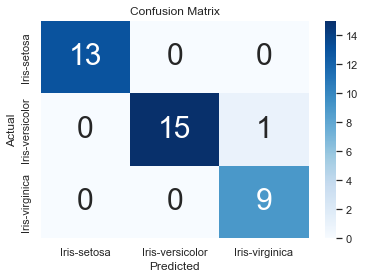

In [38]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
import seaborn as sns
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax, xticklabels=class_names, yticklabels=class_names)
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

In [39]:
ac_sc = accuracy_score(y_test, y_pred)
rc_sc = recall_score(y_test, y_pred, average="weighted")
pr_sc = precision_score(y_test, y_pred, average="weighted")
f1_sc = f1_score(y_test, y_pred, average='micro')
confusion_m = confusion_matrix(y_test, y_pred)

print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

Accuracy    :  0.9736842105263158
Recall      :  0.9736842105263158
Precision   :  0.9763157894736842
F1 Score    :  0.9736842105263158
Confusion Matrix: 
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [40]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,13,0,0,13
Iris-versicolor,0,15,1,16
Iris-virginica,0,0,9,9
All,13,15,10,38


# Question 5

In [41]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## balanced dataset

In [42]:
X = df.drop(columns=['Id', 'Species'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
y = df['Species'].copy()
y = np.array(y)
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [44]:
classes = np.unique(y)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)    
X_train.shape[0], X_test.shape[0]

(105, 45)

In [46]:
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [47]:
print(classification_report(y_pred, y_test, target_names=classes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [48]:
print(metrics.accuracy_score(y_pred, y_test))

0.9777777777777777


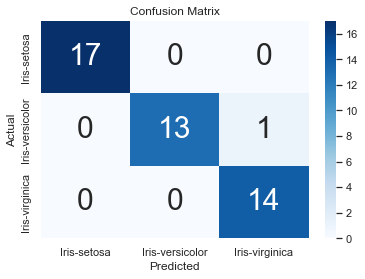

In [49]:
ax = plt.axes()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax, xticklabels=classes, yticklabels=classes)
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()

## imbalanced dataset

In [50]:
print('Iris-setosa', sum(df['Species']=='Iris-setosa'))
print('Iris-versicolor', sum(df['Species']=='Iris-versicolor'))
print('Iris-virginica', sum(df['Species']=='Iris-virginica'))

Iris-setosa 50
Iris-versicolor 50
Iris-virginica 50


In [51]:
df_imb = df.copy()
df_imb = df_imb.drop(index=[i for i in range(0,20)])
df_imb = df_imb.drop(index=[i for i in range(50,90)])
df_imb

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,21,5.4,3.4,1.7,0.2,Iris-setosa
21,22,5.1,3.7,1.5,0.4,Iris-setosa
22,23,4.6,3.6,1.0,0.2,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
24,25,4.8,3.4,1.9,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
print('Iris-setosa', sum(df_imb['Species']=='Iris-setosa'))
print('Iris-versicolor', sum(df_imb['Species']=='Iris-versicolor'))
print('Iris-virginica', sum(df_imb['Species']=='Iris-virginica'))

Iris-setosa 30
Iris-versicolor 10
Iris-virginica 50


In [53]:
X = df_imb.drop(columns=['Id', 'Species'])
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
20,5.4,3.4,1.7,0.2
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2
23,5.1,3.3,1.7,0.5
24,4.8,3.4,1.9,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
y = df_imb['Species'].copy()
y = np.array(y)
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginic

In [55]:
classes = np.unique(y)
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)    
X_train.shape[0], X_test.shape[0]

(63, 27)

In [57]:
reg_imb = LogisticRegression(max_iter=1000)
reg_imb.fit(X_train, y_train)
y_pred = reg_imb.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica'], dtype=object)

In [58]:
print(classification_report(y_pred, y_test, target_names=classes, zero_division=1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.00      1.00      0.00         0
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.96        27
      macro avg       0.67      0.98      0.66        27
   weighted avg       1.00      0.96      0.98        27



In [59]:
print(metrics.accuracy_score(y_pred, y_test))

0.9629629629629629


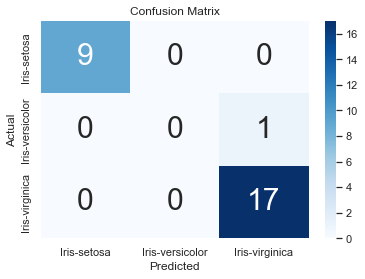

In [60]:
ax = plt.axes()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax, xticklabels=classes, yticklabels=classes)
ax.set_title('Confusion Matrix')
plt.xlabel("Predicted") 
plt.ylabel("Actual")
plt.show()